In [1]:
import os
import pandas as pd
import numpy as np
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import spatial

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
annotations = pd.read_csv('./BuckEye-annotations.csv')

In [59]:
speaker_df = annotations[annotations['filename']=='s26-1'][['filename', 'wordmin', 'wordmax', 'word', 'pa.32']]
speaker_df.sort_values(by='wordmin').to_csv('tmp', index=False, sep='\t')

speaker_df = speaker_df.sort_values(by='wordmin')


In [60]:
def convert_dur(x):
    return int(round(x, 4)*16000)

In [61]:
speaker_df

,filename,wordmin,wordmax,word,pa.32
691,s26-1,0.078187,0.199391,i,0.21875
692,s26-1,0.199391,0.471469,think,0.46875
693,s26-1,0.471469,0.607996,that,0.03125
694,s26-1,0.607996,0.727827,their,0.06250
695,s26-1,0.727827,1.623617,personalities,0.65625
696,s26-1,1.623617,1.724787,are,0.00000
697,s26-1,1.724787,2.198187,different,0.21875
698,s26-1,2.198187,2.383859,too,0.25000
699,s26-1,2.383859,2.798188,though,0.15625
700,s26-1,3.218187,3.608188,so,0.12500


In [62]:
# duration_list = speaker_df.apply(lambda x:(convert_dur(x['wordmin']), convert_dur(x['wordmax'])), axis=1).tolist()
# duration_list
avail_start_times = speaker_df['wordmin'].apply(lambda x: round(x, 5)).tolist()
avail_end_times = speaker_df['wordmax'].apply(lambda x: round(x, 5)).tolist()
avail_start_times, avail_end_times

([0.07819,
  0.19939,
  0.47147,
  0.608,
  0.72783,
  1.62362,
  1.72479,
  2.19819,
  2.38386,
  3.21819,
  3.60819,
  3.78746,
  4.02712,
  4.45953,
  5.22052,
  5.31819,
  5.43268,
  5.6527,
  6.10819,
  6.28295,
  6.64475,
  7.53051,
  7.74582,
  8.7385,
  8.83889,
  9.00307,
  9.11406,
  9.3585,
  9.69946,
  9.86743,
  10.0485,
  10.6799,
  11.00681,
  11.18754,
  11.83259,
  12.02341,
  12.2185,
  12.28075,
  12.4985,
  12.88482,
  13.2685,
  13.7256,
  14.95887,
  15.19108,
  15.33252,
  16.15366,
  16.60352,
  16.78032,
  17.08874,
  17.36867,
  17.59851,
  17.9914],
 [0.19939,
  0.47147,
  0.608,
  0.72783,
  1.62362,
  1.72479,
  2.19819,
  2.38386,
  2.79819,
  3.60819,
  3.78746,
  4.02712,
  4.45953,
  5.22052,
  5.31819,
  5.43268,
  5.6527,
  6.10819,
  6.28295,
  6.64475,
  7.07599,
  7.74582,
  8.7385,
  8.83889,
  9.00307,
  9.11406,
  9.3585,
  9.69946,
  9.86743,
  10.0485,
  10.6799,
  11.00681,
  11.18754,
  11.83259,
  12.02341,
  12.2185,
  12.28075,
  12.4985,

In [63]:
import pypar

In [64]:
alignment = pypar.Alignment('../data/datasets/Buckeye/s26-1.TextGrid')

In [65]:
speaker_df.shape

(52, 5)

In [66]:
alignment_df = pd.DataFrame(alignment.json()['words'])
alignment_df['start']

0      0.00000
1      0.07819
2      0.19939
3      0.47147
4      0.60800
5      0.72783
6      1.62362
7      1.72479
8      2.19819
9      2.38386
10     2.79819
11     3.21819
12     3.60819
13     3.78746
14     4.02712
15     4.45953
16     5.22052
17     5.31819
18     5.43268
19     5.65270
20     6.10819
21     6.28295
22     6.51018
23     7.07599
24     7.53051
25     7.74582
26     8.73850
27     8.83889
28     9.00307
29     9.11406
30     9.35850
31     9.69946
32     9.86743
33    10.04850
34    10.67990
35    11.00681
36    11.18754
37    11.83259
38    12.02341
39    12.21850
40    12.28075
41    12.49850
42    12.88482
43    13.26850
44    13.72560
45    14.07850
46    14.95887
47    15.19108
48    15.33252
49    16.15366
50    16.60352
51    16.78032
52    17.08874
53    17.36867
54    17.59851
55    17.99140
56    18.21142
Name: start, dtype: float64

In [67]:
json_align = alignment.json()
new_json = {'words':[]}
for obj in json_align['words']:
    if obj['start'] in avail_start_times or obj['end'] in avail_end_times:
        new_json['words'].append(obj)
    else:
        print(obj)
    

{'alignedWord': '{B_TRANS}', 'start': 0.0, 'end': 0.07819, 'phonemes': [['{B_TRANS}', 0.0, 0.07819]]}
{'alignedWord': '<SIL>', 'start': 2.79819, 'end': 3.21819, 'phonemes': [['SIL', 2.79819, 3.21819]]}
{'alignedWord': '<SIL>', 'start': 7.07599, 'end': 7.53051, 'phonemes': [['SIL', 7.07599, 7.53051]]}
{'alignedWord': '<SIL>', 'start': 14.0785, 'end': 14.95887, 'phonemes': [['SIL', 14.0785, 14.95887]]}
{'alignedWord': '{E_TRANS}', 'start': 18.21142, 'end': 18.29381, 'phonemes': [['{E_TRANS}', 18.21142, 18.29381]]}


In [56]:
len(new_json['words'])

66

In [37]:
import json
with open('new_json_tmp.json', 'w') as f:
    json.dump(new_json, f)

In [15]:
new_alignment = pypar.Alignment(new_json)

In [17]:
new_alignment.save_json('s02-1.json')

In [19]:
new_json_align = pypar.Alignment('s02-1.json')

In [30]:
len(new_json_align.word_bounds(16000))

72

In [31]:
len(new_json_align.words())

73

In [24]:
0.2288*16000

3660.8

In [29]:
16000*21.1718

338748.8

### Single file analysis

In [4]:
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye/s0201b.prom', header=None)
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye_v1/s02-1.prom', header=None)
# predictions = pd.read_table('../eval/sanity_check_cosine/s02-1.prom', header=None)
predictions = pd.read_table('../eval/sanity_check_cosine/s17-1.prom', header=None)

In [5]:
# avail_window = annotations[annotations['filename']=="s02-1"].reset_index(drop=True)
avail_window = annotations[annotations['filename']=="s17-1"].reset_index(drop=True)
# target_window = predictions[117:189].reset_index(drop=True)
target_window = predictions.reset_index(drop=True)

avail_tokens = avail_window['word'].tolist()
target_tokens = target_window[3].tolist()

In [6]:
avail_window

,token,word,pos,contfunc,tobiaccent,tobiboundary,accented,boundary,prenuclear,nuclear,...,t31.pi,t32.pi,max.f0.sv.st,min.f0.sv.st,range.f0.sv.st,vel.f0.sv.st,mintime,maxtime,jump,max.f0.sv.st.norm
0,471,well,Discourse,Function,H*,L-,1,1,0,1,...,0,0,96.178341,91.568426,-4.609915,-43.083317,0.255063,0.148063,none,-0.947183
1,472,it,Pronoun,Function,NaN,NaN,0,0,0,0,...,0,0,97.896786,94.541258,3.355528,40.428049,0.326062,0.409062,none,0.045264
2,473,could,Verb2,Content,H*,NaN,1,0,1,0,...,0,0,100.212648,98.420079,-1.792568,-37.345172,0.617062,0.569063,none,1.373172
3,474,have,Verb2,Content,NaN,NaN,0,0,0,0,...,0,0,96.983594,93.743035,-3.240559,-63.540370,0.695063,0.644062,none,0.286963
4,475,been,Verb2,Content,NaN,NaN,0,0,0,0,...,0,0,93.892994,91.899513,-1.993481,-23.180013,0.887062,0.801063,none,-0.026418
5,476,prevented,Verb,Content,H*,NaN,1,0,0,1,...,1,1,90.537130,88.653722,-1.883408,-20.696787,1.442063,1.351063,none,-0.502023
6,477,but,Conjunction,Function,NaN,H-,0,1,0,0,...,0,0,88.465621,87.644154,-0.821467,-12.446468,1.634062,1.568062,none,-1.137913
7,478,we,Pronoun,Function,NaN,NaN,0,0,0,0,...,0,0,91.100089,89.773652,-1.326437,-55.268223,1.797063,1.773062,none,1.226366
8,479,didn't,Contraction2,Function,NaN,NaN,0,0,0,0,...,0,0,89.782502,89.322608,-0.459894,-13.526301,1.928063,1.894062,none,0.422634
9,480,know,Verb,Content,NaN,NaN,0,0,0,0,...,1,0,88.978239,88.061693,-0.916546,-8.812944,2.159063,2.055063,none,-0.307881


In [7]:
target_window

,0,1,2,3,4,5
0,s17-1,0.098,0.326,well,1.798,0.224
1,s17-1,0.326,0.446,it,0.940,1.067
2,s17-1,0.446,0.644,could,1.746,0.001
3,s17-1,0.644,0.742,have,0.335,1.351
4,s17-1,0.742,0.942,been,1.011,1.133
5,s17-1,0.942,1.503,prevented,1.360,1.244
6,s17-1,1.503,1.698,but,0.778,0.564
7,s17-1,1.698,1.798,we,0.792,0.265
8,s17-1,1.798,2.014,didn't,0.489,0.234
9,s17-1,2.014,2.159,know,0.607,0.000


In [8]:
# candidate1 = avail_window[0:15]['pa.32'].values
candidate1 = avail_window[0:15]['pa.32'].values
candidate1

array([0.59375, 0.     , 0.1875 , 0.0625 , 0.03125, 0.5625 , 0.     ,
       0.     , 0.03125, 0.0625 , 0.     , 0.     , 0.     , 0.53125,
       0.03125])

In [9]:
candidate2 = target_window[4].values
candidate2

array([1.798, 0.94 , 1.746, 0.335, 1.011, 1.36 , 0.778, 0.792, 0.489,
       0.607, 0.   , 0.667, 0.609, 1.098, 0.887])

In [10]:
1 - spatial.distance.cosine(candidate1, candidate2)

0.7489379035381454

In [11]:
target_tokens==avail_tokens

False

In [12]:
len(target_tokens), len(avail_tokens)

(15, 49)

In [13]:
l, r = 0, 0
pairs = []

while l<len(target_window) and r<len(avail_window):
    if target_window[3][l]==avail_window['word'][r]:
        pairs.append([(target_window[3][l], target_window[4][l]), (avail_window['word'][r], avail_window['pa.32'][r])])
        l+=1
        r+=1
    else:
        print('mismatched pair', target_window[3][l], avail_window['word'][r], l, r)
        l+=1


In [14]:
v1 = []
v2 = []
for pair in pairs:
    v1.append(pair[0][-1])
    v2.append(pair[1][-1])

In [15]:
v1[-1], v2[-1]

(0.887, 0.03125)

In [16]:
v1 = np.asarray(v1)
v2 = np.asarray(v2)

In [17]:
v1[-1], v2[-1]

(0.887, 0.03125)

In [18]:
v1, v2

(array([1.798, 0.94 , 1.746, 0.335, 1.011, 1.36 , 0.778, 0.792, 0.489,
        0.607, 0.   , 0.667, 0.609, 1.098, 0.887]),
 array([0.59375, 0.     , 0.1875 , 0.0625 , 0.03125, 0.5625 , 0.     ,
        0.     , 0.03125, 0.0625 , 0.     , 0.     , 0.     , 0.53125,
        0.03125]))

In [19]:
result = 1 - spatial.distance.cosine(v1, v2)
result

0.7489379035381454

In [20]:
from scipy.special import rel_entr
from scipy.stats import ks_2samp
from sklearn import preprocessing

In [21]:
v1_norm = preprocessing.normalize([v1])
v2_norm = preprocessing.normalize([v2])


In [22]:
sum(rel_entr(v1_norm[0], v2_norm[0]))


inf

In [23]:
v2_norm

array([[0.59462167, 0.        , 0.18777526, 0.06259175, 0.03129588,
        0.56332579, 0.        , 0.        , 0.03129588, 0.06259175,
        0.        , 0.        , 0.        , 0.53202991, 0.03129588]])

In [24]:
1 - spatial.distance.cosine(v1_norm[0], v2_norm[0])

0.7489379035381452

**two-sample Kolmogorov-Smirnov test:** Under the null hypothesis the two distributions are identical. If the K-S statistic is small or the p-value is high (greater than the significance level, say 5%), then we cannot reject the hypothesis that the distributions of the two samples are the same. Conversely, we can reject the null hypothesis if the p-value is low.



In [25]:
ks_2samp(v1_norm[0], v2)

KstestResult(statistic=0.6666666666666666, pvalue=0.0018373939965002021)

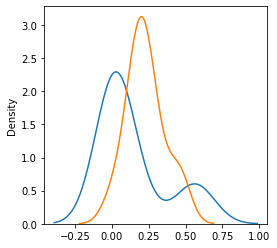

In [27]:
plt.figure(figsize=(4,4))
sns.distplot(v2_norm[0], hist=False, kde=True)
sns.distplot(v1_norm[0], hist=False, kde=True)
plt.show()

### Define function

In [30]:
from scipy.special import rel_entr
from scipy.stats import ks_2samp
from sklearn import preprocessing

In [83]:
def eval_similarity(avail_window, target_window):

    l, r = 0, 0
    pairs = []

    while l<len(target_window) and r<len(avail_window):
        if target_window[3][l]==avail_window['word'][r]:
            pairs.append([(target_window[3][l], target_window[4][l]), (avail_window['word'][r], avail_window['pa.32'][r])])
            l+=1
            r+=1
        else:
            # print('mismatched pair', target_window[3][l], avail_window['word'][r], l, r)
            l+=1

    v1 = []
    v2 = []
    
    t1 = []
    t2 = []
    
    for pair in pairs:
        v1.append(pair[0][-1])
        v2.append(pair[1][-1])
        
        t1.append(pair[0][0])
        t2.append(pair[1][0])

    v1 = np.asarray(v1)
    v2 = np.asarray(v2)
    
    # print(t1)
    # print(t2)
    
    assert t1==t2
    assert v1.shape[0]==v2.shape[0]
    
    print(f"{v1.shape[0]} tokens compared, {len(avail_window)} tokens were available in annotation")
    if len(v1)>0 and len(v2)>0:
        result = 1 - spatial.distance.cosine(v1, v2)
    else:
        result = None

    v1_norm = preprocessing.normalize([v1])
    v2_norm = preprocessing.normalize([v2])
    
    plt.figure(figsize=(4,4))
    sns.distplot(v2_norm[0], hist=False, kde=True, label='ground_truth', color='green')
    sns.distplot(v1_norm[0], hist=False, kde=True, label='wavelet_pred', color='orange')
    plt.show()

    return result



### Multi-file analysis

In [84]:
annotations['filename'].unique()

array(['s02-1', 's03-1', 's04-1', 's10-1', 's11-1', 's14-1', 's16-1',
       's17-1', 's21-1', 's22-1', 's24-1', 's25-1', 's26-1', 's32-1',
       's33-1', 's35-1'], dtype=object)

#### S14

In [85]:
predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye_v1/s14-1.prom', header=None)
avail_window = annotations[annotations['filename']=="s14-1"].reset_index(drop=True)
# manually finding out the window indices
target_window = predictions.reset_index(drop=True)

In [86]:
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye/s1401a.prom', header=None)
# avail_window = annotations[annotations['filename']=="s14-1"].reset_index(drop=True)
# # manually finding out the window indices
# target_window = predictions[5:72].reset_index(drop=True)

67 tokens compared, 67 tokens were available in annotation


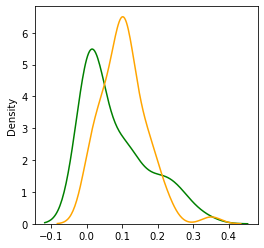

0.7682297283068056

In [87]:
eval_similarity(avail_window, target_window)

#### S17

In [88]:
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye/s1701a.prom', header=None)
# avail_window = annotations[annotations['filename']=="s17-1"].reset_index(drop=True)
# target_window = predictions[606:656].reset_index(drop=True)

predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye_v1/s17-1.prom', header=None)
avail_window = annotations[annotations['filename']=="s17-1"].reset_index(drop=True)
target_window = predictions.reset_index(drop=True)

47 tokens compared, 49 tokens were available in annotation


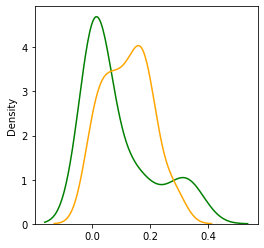

0.7665667636078723

In [89]:
eval_similarity(avail_window, target_window)

#### S21

In [90]:
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye/s2101b.prom', header=None)
# avail_window = annotations[annotations['filename']=="s21-1"].reset_index(drop=True)
# target_window = predictions[537:582].reset_index(drop=True)

predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye_v1/s21-1.prom', header=None)
avail_window = annotations[annotations['filename']=="s21-1"].reset_index(drop=True)
target_window = predictions.reset_index(drop=True)

38 tokens compared, 45 tokens were available in annotation


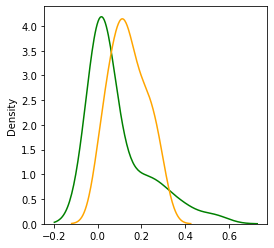

0.7316878485143593

In [91]:
eval_similarity(avail_window, target_window)

#### S22

In [92]:
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye/s2201a.prom', header=None)
# avail_window = annotations[annotations['filename']=="s22-1"].reset_index(drop=True)
# target_window = predictions[15:48].reset_index(drop=True)

predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye_v1/s22-1.prom', header=None)
avail_window = annotations[annotations['filename']=="s22-1"].reset_index(drop=True)
target_window = predictions.reset_index(drop=True)

33 tokens compared, 33 tokens were available in annotation


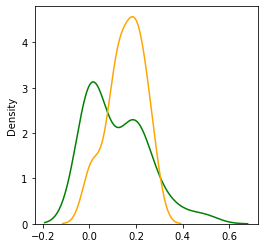

0.8125833383271772

In [93]:
eval_similarity(avail_window, target_window)

#### S25

In [94]:
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye/s2501a.prom', header=None)
# avail_window = annotations[annotations['filename']=="s25-1"].reset_index(drop=True)
# target_window = predictions[494:572].reset_index(drop=True)

predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye_v1/s25-1.prom', header=None)
avail_window = annotations[annotations['filename']=="s25-1"].reset_index(drop=True)
target_window = predictions.reset_index(drop=True)

78 tokens compared, 78 tokens were available in annotation


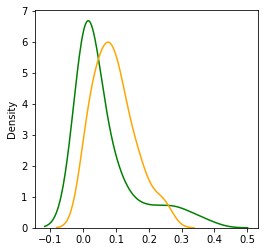

0.6198016519175178

In [95]:
eval_similarity(avail_window, target_window)

#### S26

In [96]:
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye/s2601a.prom', header=None)
# avail_window = annotations[annotations['filename']=="s26-1"].reset_index(drop=True)
# target_window = predictions[427:480].reset_index(drop=True)

predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye_v1/s26-1.prom', header=None)
avail_window = annotations[annotations['filename']=="s26-1"].reset_index(drop=True)
target_window = predictions.reset_index(drop=True)

51 tokens compared, 52 tokens were available in annotation


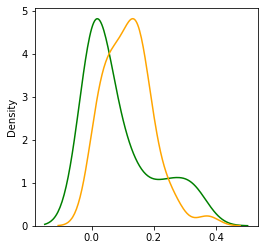

0.6479532360482125

In [97]:
eval_similarity(avail_window, target_window)

#### S32

In [98]:
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye/s3201a.prom', header=None)
# avail_window = annotations[annotations['filename']=="s32-1"].reset_index(drop=True)
# target_window = predictions[129:195].reset_index(drop=True)

predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye_v1/s32-1.prom', header=None)
avail_window = annotations[annotations['filename']=="s32-1"].reset_index(drop=True)
target_window = predictions.reset_index(drop=True)



52 tokens compared, 67 tokens were available in annotation


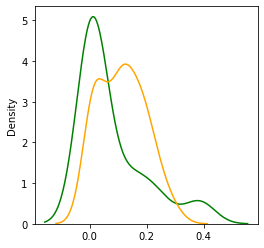

0.7394389509867254

In [99]:
eval_similarity(avail_window, target_window)

#### S33

In [100]:
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye/s3301a.prom', header=None)
# avail_window = annotations[annotations['filename']=="s33-1"].reset_index(drop=True)
# target_window = predictions[130:168].reset_index(drop=True)

In [101]:
# eval_similarity(avail_window, target_window)

#### S35

In [129]:
# predictions = pd.read_table('../emphases/baselines/prominence/test_outputs_buckeye/s3501a.prom', header=None)
# avail_window = annotations[annotations['filename']=="s35-1"].reset_index(drop=True)
# target_window = predictions[281:337].reset_index(drop=True)

In [130]:
# eval_similarity(avail_window, target_window)